## Skill tags frequency analysis for jobs in Reed.co.uk|

In [4]:
# Import basic and advanced modules
import nltk
stopWords = nltk.corpus.stopwords.words("english")
# Add some more stop words to nltk stop words
stopWords.extend(["-","&","/","1","4","3","7","2"])


from IPython.core.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import aiohttp
import asyncio
import time
import datetime
from bs4 import BeautifulSoup
import requests
import nest_asyncio
# Required to read and write todays data.
today = datetime.datetime.today().strftime('%d_%b')

In [2]:
# Scrape data for the jobs
# Add "nest_asyncio.apply()" code snippet, otherwise it throws "RuntimeError: asyncio.run() cannot be called from a running event loop"
nest_asyncio.apply()
def scrapeJobs(url,stopPage):
    start = time.time()
    
    # Initialize variables to be extracted
    jobLink = []
    jobTitle = []
    skillTags = []
    
    # Assign stop page (27 jobs per page)
    stopPage = stopPage
    
    
    # This portion scrapes all the indvidual job link of that job category
    async def fetch(session, url):
        async with session.get(url) as response:
            return await response.text()
        
    async def main():
        async with aiohttp.ClientSession() as session:
            # Iterate over the stop page to scrape all the indvidual job link with page size 27
            for page in range(1,stopPage+1):
                htmlJobLink = await fetch(session, url + f"{page}")
                soupJobLink = BeautifulSoup(htmlJobLink,"html.parser")
                for lnk in soupJobLink.find_all("h3",class_="title"):
                    jobLink.append(str("https://www.reed.co.uk")+lnk.find("a").get("href"))
                    
    asyncio.run(main())
    
                    
    # Information parsing. Scrape all the variables except jobLink by sending requests to jobLink
    async def fetch(session, url):
        async with session.get(url) as response:
            return await response.text()
        
    async def main():
        async with aiohttp.ClientSession() as session:
            # Count the no of requests
            req = 0
            # Extract job title from url
            jobName = url.split("/")[4].title()
            for lnk,reqCount in zip(jobLink,range(1,len(jobLink)+1)):
                htmlInfo = await fetch(session, lnk)
                req = req+1
                print(f"{jobName} => Requests Completed: {req} out of {len(jobLink)}")
                soupInfo = BeautifulSoup(htmlInfo,"html.parser")
                # Clear all the outputs except the current one in notebook console
                clear_output(wait=True)
                
                # Extract job title
                try:
                    titleTag = soupInfo.find("h1")
                    jobTitle.append(titleTag.text)
                except:
                    jobTitle.append("missing")
                
                # Extract skill tags
                try:
                    skillTagsTag = soupInfo.find("div",class_="skills")
                    skillTags.append(skillTagsTag.text.strip())
                except:
                    skillTags.append("missing")
                
    asyncio.run(main())
    
    #Create a df of extracted variables
    primaryDf = pd.DataFrame({"jobTitle":jobTitle,
                              "jobLink":jobLink,
                              "skillTags":skillTags})
    duration = np.round((time.time()-start)/60,2)
    
    print(f"Time required to scrape {len(primaryDf)} observations: {duration} minutes")
    return primaryDf

In [88]:
# Call the function. We would like to scrape vehicle technician jobs.
# stopPage = no. of jobs/27. No of jobs per page is 27.
# 2580/27 = 96
vehicleJobs = scrapeJobs("https://www.reed.co.uk/jobs/vehicle-technicians-jobs",96)

Time required to scrape 2592 observations: 20.14 minutes


In [5]:
# Read in today's data data
vehicleDf = pd.read_csv(f"{today}_vehicleTechnicianJobs.csv")
vehicleDf.head()

,jobTitle,jobLink,skillTags
0,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,Required skills\n\nbrakes\nservicing\ngearbox\...
1,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,Required skills\n\nbrakes\nservicing\ngearbox\...
2,Vehicle Technicians,https://www.reed.co.uk/jobs/vehicle-technician...,missing
3,5 x PDI Vehicle Technicians,https://www.reed.co.uk/jobs/5-x-pdi-vehicle-te...,missing
4,Light & Heavy Vehicle Technicians - Chelmsford,https://www.reed.co.uk/jobs/light-heavy-vehicl...,Required skills\n\nLight & Heavy Vehicle Techn...


In [6]:
# Remove "Required skills" from skillTags
vehicleDf.skillTags = vehicleDf.skillTags.str.replace("Required skills","")
vehicleDf.head()

,jobTitle,jobLink,skillTags
0,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,\n\nbrakes\nservicing\ngearbox\ncambelt\nclutch
1,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,\n\nbrakes\nservicing\ngearbox\ncambelt\nclutch
2,Vehicle Technicians,https://www.reed.co.uk/jobs/vehicle-technician...,missing
3,5 x PDI Vehicle Technicians,https://www.reed.co.uk/jobs/5-x-pdi-vehicle-te...,missing
4,Light & Heavy Vehicle Technicians - Chelmsford,https://www.reed.co.uk/jobs/light-heavy-vehicl...,\n\nLight & Heavy Vehicle Technician


In [7]:
# Remove observations with missing tags
dropMissingTags = vehicleDf[vehicleDf.skillTags=='missing'].index
vehicleDfCleaned = vehicleDf.drop(dropMissingTags,axis=0).reset_index(drop=True)
vehicleDfCleaned.head()

,jobTitle,jobLink,skillTags
0,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,\n\nbrakes\nservicing\ngearbox\ncambelt\nclutch
1,Vehicle Technician,https://www.reed.co.uk/jobs/vehicle-technician...,\n\nbrakes\nservicing\ngearbox\ncambelt\nclutch
2,Light & Heavy Vehicle Technicians - Chelmsford,https://www.reed.co.uk/jobs/light-heavy-vehicl...,\n\nLight & Heavy Vehicle Technician
3,Light & Heavy Vehicle Technicians - Leeds Late...,https://www.reed.co.uk/jobs/light-heavy-vehicl...,\n\nVehicle Technician - Light and Heavy
4,Test Technicians - EV / Electric Vehicle Power...,https://www.reed.co.uk/jobs/test-technicians-e...,\n\nPowertrain\nTechnician\nElectric Vehicle


## So we will count the monogram, bigram and trigram frequency of skill tags required for vehicle technician jobs

In [8]:
# Remove stopwords from job title and skill tags
#vehicleDfCleaned.jobTitle = vehicleDfCleaned.jobTitle.apply(lambda x: " ".join([word for word in x.split() if word not in (stopWords)]))
vehicleDfCleaned.skillTags = vehicleDfCleaned.skillTags.apply(lambda x: " ".join([word for word in x.split() if word not in (stopWords)]))
vehicleDfCleaned.skillTags.head(10)

0              brakes servicing gearbox cambelt clutch
1              brakes servicing gearbox cambelt clutch
2                       Light Heavy Vehicle Technician
3                       Vehicle Technician Light Heavy
4               Powertrain Technician Electric Vehicle
5    Automotive Mechanic Vehicle Maintenance Vehicl...
6    Mechanic NVQ Level NVQ Level MOT Tester Vehicl...
7              brakes servicing gearbox cambelt clutch
8              brakes servicing gearbox cambelt clutch
9    Automotive Mechanic Motor Trade Technician Mot...
Name: skillTags, dtype: object

In [9]:
# Calculate unigram of skill tags
unigramsTag  = (
    vehicleDfCleaned["skillTags"].str.split(expand=True).stack())

# Generate bigrams by concatenating unigram columns
bigramsTag = unigramsTag + " " + unigramsTag.shift(-1)

# Generate trigrams by concatenating unigram columns
trigramsTag = bigramsTag + " " + unigramsTag.shift(-2)

#### Calculate unigram of job title
unigramsTitle  = (
    vehicleDfCleaned["jobTitle"].str.split(expand=True).stack())

#### Generate bigrams by concatenating unigram columns
bigramsTitle = unigramsTitle + " " + unigramsTitle.shift(-1)

#### Generate trigrams by concatenating unigram columns
trigramsTitle = bigramsTitle + " " + unigramsTitle.shift(-2)

In [47]:
# Function to display bar labels in bar plot
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Words Count', fontsize = font_size)
    plt.xticks(rotation = 90, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'red')
        
def absoluteFreq(variable,title):
    global  ax
    
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts().head(25)
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency})
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,8)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = title, figsize = fig_size,color ='teal')
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    sns.despine()
    plt.show()

#### Fequency of words in animal jobs title
absoluteFreq(unigramsTitle,'Fequency of Words (Top 30) Used in Vehicle Technician Jobs Title')
absoluteFreq(bigramsTitle,'Fequency of Words (Top 30) Used in Vehicle Technician Jobs title')
absoluteFreq(trigramsTitle,'Fequency of Words (Top 30) Used in Vehicle Technician Jobs Title')

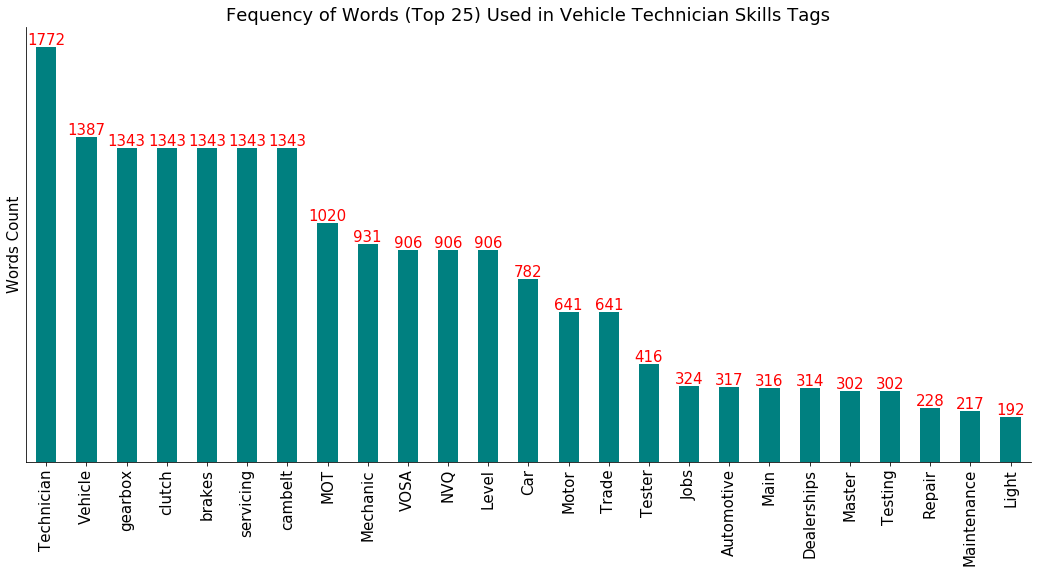

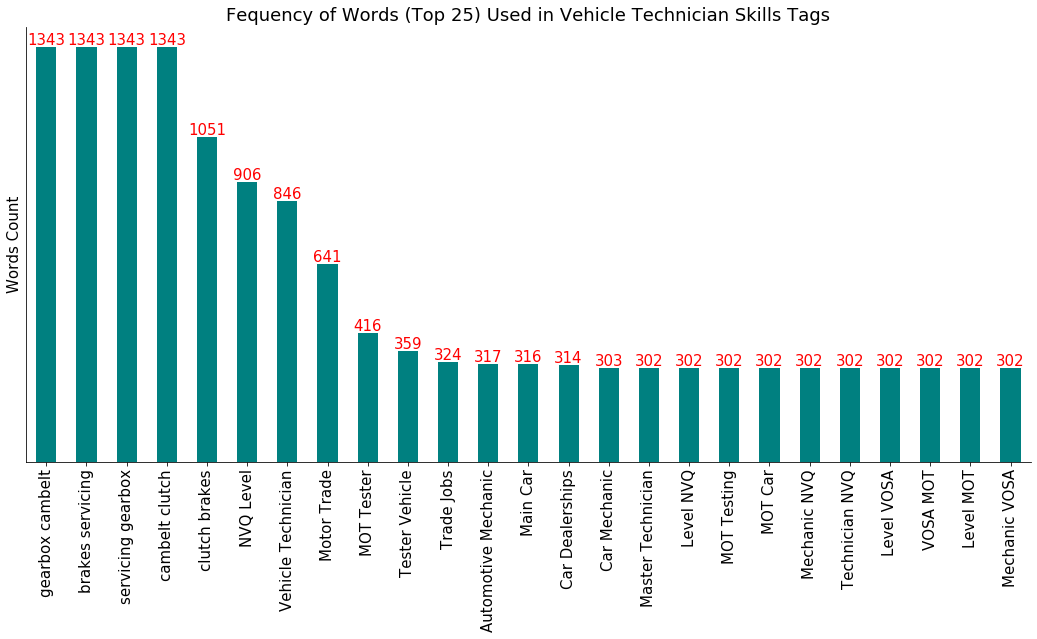

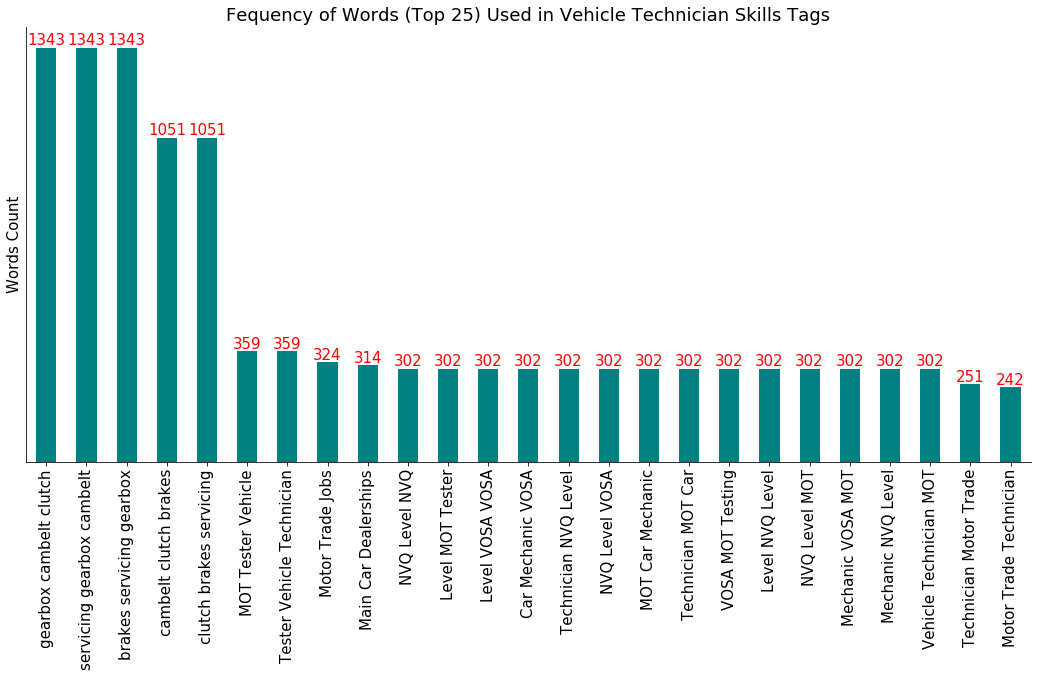

In [49]:
# Fequency of words in jobs skill tags
absoluteFreq(unigramsTag,'Fequency of Words (Top 25) Used in Vehicle Technician Skills Tags')
absoluteFreq(bigramsTag,'Fequency of Words (Top 25) Used in Vehicle Technician Skills Tags')
absoluteFreq(trigramsTag,'Fequency of Words (Top 25) Used in Vehicle Technician Skills Tags')

### As it turns out, "gearbox","clutch,"servicing","cambelt","MOT","Mechanic","VOSA" etc are the most frequent skills, one would require to get a vehicle technician jobs in UK according to Reed.

In [29]:
# Just take out the unigrams tags and create a excel file
unigramsTag.value_counts().to_frame("occurrences").reset_index().rename(columns={"index":"skillName"}).to_excel("vehicleTechnicianSkills.xlsx",index=None)